## The Frechet distribution

The Frechet distribution gives the Ricardian model in Eaton and Kortum (2002) relatively simple, closed form solutions. Here, we explore some of its properties. 

In [1]:
%matplotlib inline

import numpy as np
import math
import matplotlib.pyplot as plt

### The distribution

$$ F_i(z)=\mathrm{prob}(z_i(k)\leq z)=e^{-T_iz^{-\theta}}$$
If $\theta>1$, the mean is
$$\mu = T^{\frac{1}{\theta}}\Gamma\left(1-\theta^{-1}\right),$$
and, if $\theta>2$, the variance is 
$$\sigma^2 = T^{\frac{2}{\theta}}\left\{ \Gamma\left(1-2\theta^{-1} \right)-\left[\Gamma\left(1-\theta^{-1} \right)\right]^2 \right\},$$
where the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) is defined as 
$$\Gamma(z) = \int_0^\infty \!\! x^{z-1}e^{-x}\,dx,$$
which is approximated numerically in these exercises using `math.gamma()`. 

Notice that the mean and variance are functions of both $T$ and $\theta$. 

In [2]:
# The Frechet pdf
def pdf(x, theta, T):
    return math.exp(-T*x**(-theta))*T*theta*x**(-theta-1)

# The inverse of the Frechet cdf.  For drawing random Frechet numbers.
def cdf_inv(u,theta,T):
    return (-1/T*math.log(u))**(-1/theta)

### How $\theta$ and $T$ change the distribution

Let's start with the $T$ parameter. 

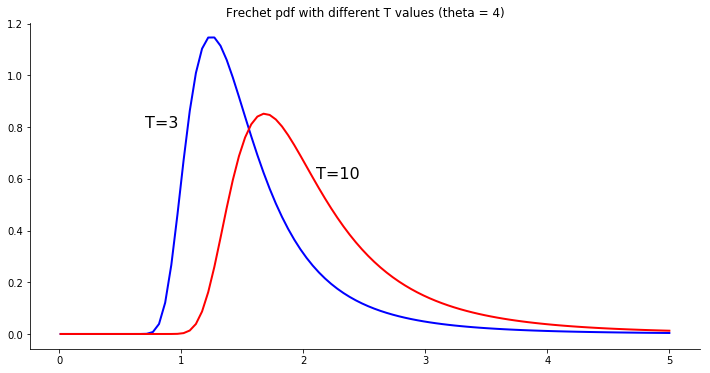

In [3]:
xs=np.linspace(0.01,5,100)

# Example: theta = 4, T = 3
theta1 = 4
T1 = 3

# create a list of the pdf value for each x
ys = [pdf(x,theta1,T1) for x in xs]      

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(xs, ys, color='blue', linewidth=2, label='T=3')
ax.text( 0.7, 0.8, 'T=3', fontsize=16)

# The mean
# ax.axvline(x=T1**(1/theta1)*math.gamma(1-1/theta1), color='blue', linestyle='--')

# Now increase T
T2 = 10
ys = [pdf(x,theta1,T2) for x in xs]
ax.plot(xs, ys, color='red', linewidth=2)
ax.text( 2.1, 0.6, 'T=10', fontsize=16)
# The mean
# ax.axvline(x=T2**(1/theta1)*math.gamma(1-1/theta1), color='red', linestyle='--')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Frechet pdf with different T values (theta = 4)')


plt.show()


As we increase $T$, the distribution moves to the right. This is changing both the mean and the variance. 

### The $\theta$ parameter
Now, let's experiment with the $\theta$ parameter. Plot the pdfs with different thetas, and hold the T parameter fixed. 

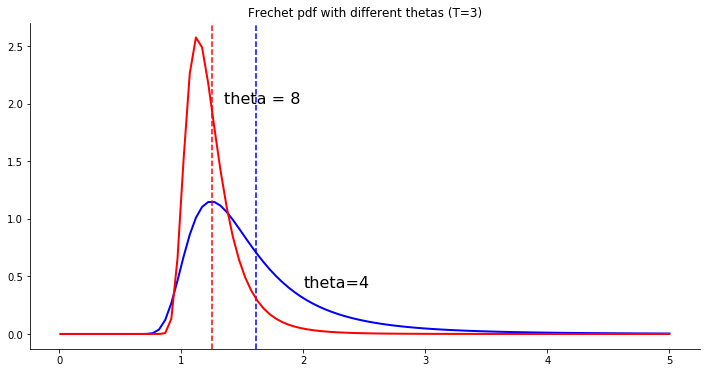

In [4]:
# Example: theta = 4, T = 3
T1 = 3
theta1 = 4

# create a list of the pdf value for each x
ys = [pdf(x,theta1,T1) for x in xs]      

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(xs, ys, color='blue', linewidth=2, label='T=3')
ax.text( 2, 0.4, 'theta=4', fontsize=16)

# The mean
ax.axvline(x=T1**(1/theta1)*math.gamma(1-1/theta1), color='blue', linestyle='--')

# Now increase theta
theta2 = 8
ys=[pdf(x,theta2,T1) for x in xs]

# The mean
ax.axvline(x=T1**(1/theta2)*math.gamma(1-1/theta2), color='red', linestyle='--')

ax.plot(xs, ys, color='red', linewidth=2)
plt.text(1.35,2,'theta = 8', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Frechet pdf with different thetas (T=3)')
plt.show()

### The max over Frechet is Frechet
$$\Phi_n = \sum_{i=1}^N T_i [w_i(1+\tau_{ni})]^{-\theta}$$

This is the result of taking the max over Frechet-distributed random variables. This bit of code below demonstrates this property.  

To make things simple, suppose that all the countries are identical. $$\Phi_n= N \times T [w(1+\tau)]^{-\theta}$$
and that $\tau=0$ and $w=1$.
$$\Phi_n=N \times T$$

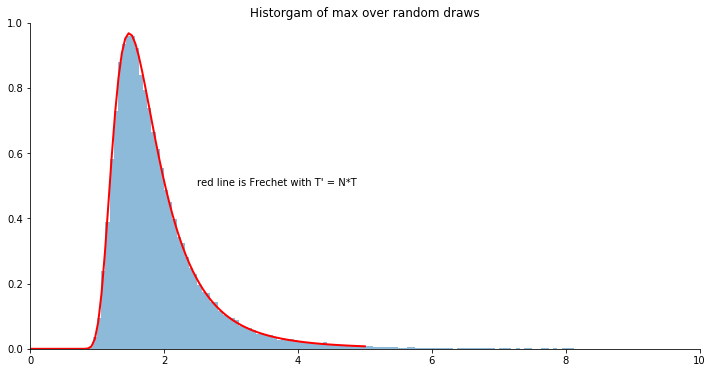

In [8]:
'''
This bit of code demonstrates that the max over Frechet draws is also distributed
Frechet, but with a different level parameter.  To do so, we'll draw some random
numbers, take the max, and plot the historgram.
'''
# Plot the theoretical distribution when = 0
only_hist = 0

# Draw Random numbers 
K = 50000      # number of goods
N = 3           # number of "countries" (draws per good)
T = 2           # level parameter
theta = 4       # original shape parameter

# Draw uniform random, nubers.
uni = np.random.rand(K,N)

# Convert to Frechet randoms (probably a better python way to do this)
z = np.zeros((K,N))
for i in range(0,K):
    for j in range(0,N):
        z[i,j] = cdf_inv(uni[i,j],theta,T)
 
 
# Take max for each good  (I hard coded N=3 here. I need to up my python skills.)
max_draw=[max(z[i,0], z[i,1], z[i,2]) for i in range(0,K) ]     
        
# Plot the histogram.  As we increase K, this should look better and better.
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(max_draw, bins=400, normed=True, range=(0,25), alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axis([0,10,0,1])
plt.title('Historgam of max over random draws')
    
if only_hist == 0:
    # This is the theoretical distribution.  It is a Frechet with the level parameter
    # summed over the number of draws per good --- in this case, 3
    TT = N * T
    y = [pdf(x, theta, TT) for x in xs]
   
    # Plot the theoretical distribution
    plt.plot(xs,y,color='red', lw=2)
    plt.text(2.5,0.5,'red line is Frechet with T\' = N*T')
    
plt.show()